In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def distance(a, b):
    """
    Distance using the norm
    """
    a = [x[1:] for x in a]
    b = [x[1:] for x in b]

    return np.linalg.norm(np.array(a) - np.array(b))

def atomic_distance(a, b):
    """
    Distance using the norm
    """
    return np.linalg.norm(np.array(a[1:]) - np.array(b[1:]))

def get_angle(a, b, c):
    v1 = np.array(a[1:]) - np.array(b[1:])
    v2 = np.array(a[1:]) - np.array(c[1:])
    a_mag = np.linalg.norm(v1)
    b_mag = np.linalg.norm(v2)
    theta = np.arccos(np.dot(v1,v2)/(a_mag * b_mag))
    return np.degrees(theta)
    
def water_angle(g):
    return get_angle(g[0], g[1], g[2])

def water_d1_2(g):
    return atomic_distance(g[0], g[1])

def water_d1_3(g):
    return atomic_distance(g[0], g[2])

def water_d2_3(g):
    return atomic_distance(g[1], g[2])

def get_geometry(key):
    f = open("h2o/geometries/h2o_{}.xyz".format(key)).readlines()
    f = [[x.split()[0] , float(x.split()[1]) , float(x.split()[2]) , float(x.split()[3])] for x in f[2:]]
    
    return f



path = "h2o/data/"

df1 = pd.read_csv("water_GDMA.csv")
df2 = pd.read_csv("water_esp_error.csv")



result = df1.merge(df2, left_on="key", right_on="key")

result = result.dropna()

result["c-f"] = result.conformational_error - result.fitting_error 


result

,key,$\Delta$dipole,RMSD,$\Delta$R0,$\Delta$R1,$\Delta$R2,MP2,fitting_error,conformational_error,c-f
0,2737,1.866478,0.086840,0.046904,0.559521,2.104708,2.148560,0.687379,0.873317,0.185938
1,2833,1.861255,0.086293,0.043932,0.561036,2.103347,1.881433,0.687137,0.853865,0.166728
2,2858,1.861225,0.082867,0.043616,0.561260,2.097600,1.890846,0.685902,0.846713,0.160811
3,2849,1.853180,0.086868,0.040227,0.563011,2.125361,1.480398,0.690827,0.843186,0.152359
4,2871,1.735961,0.077202,0.039276,0.615725,2.090241,1.501545,0.674668,0.742317,0.067648
...,...,...,...,...,...,...,...,...,...,...
513,2255,1.792925,0.047380,0.000667,0.587838,2.082543,0.023657,0.678702,0.690996,0.012294
514,2542,1.790936,0.031325,0.000562,0.588002,2.111250,0.001883,0.684158,0.682366,-0.001793
515,255,1.792278,0.036537,0.000328,0.587991,2.092564,0.006965,0.680615,0.685845,0.005230
516,2235,1.791048,0.019106,0.000318,0.588294,2.106404,0.000000,0.683080,0.683193,0.000114


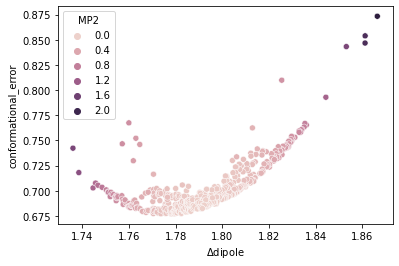

<AxesSubplot:xlabel='$\\Delta$dipole', ylabel='c-f'>

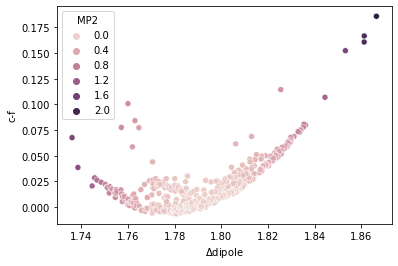

In [9]:

sns.scatterplot(data=result, x="$\Delta$dipole", y="conformational_error", hue="MP2")
plt.show()

sns.scatterplot(data=result, x="$\Delta$dipole", y="c-f", hue="MP2")

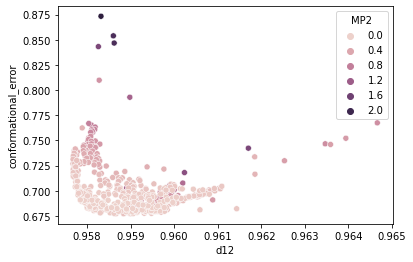

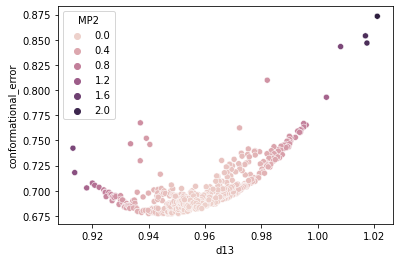

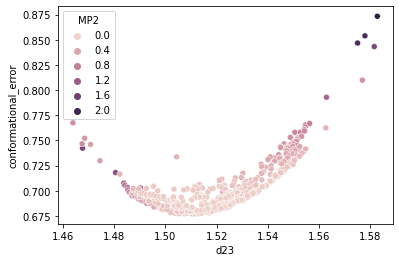

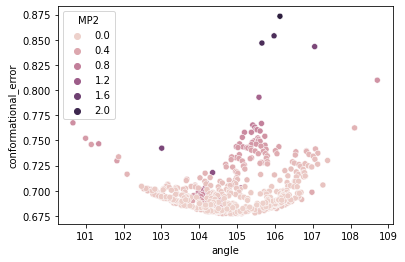

In [11]:
result["d12"] = result["key"].apply(lambda x: water_d1_2(get_geometry(x)))
result["d13"] = result["key"].apply(lambda x: water_d1_3(get_geometry(x)))
result["d23"] = result["key"].apply(lambda x: water_d2_3(get_geometry(x)))
result["angle"] = result["key"].apply(lambda x: water_angle(get_geometry(x)))

sns.scatterplot(data=result, x="d12", y="conformational_error", hue="MP2")
plt.show()

sns.scatterplot(data=result, x="d13", y="conformational_error", hue="MP2")
plt.show()

sns.scatterplot(data=result, x="d23", y="conformational_error", hue="MP2")
plt.show()

sns.scatterplot(data=result, x="angle", y="conformational_error", hue="MP2")
plt.show()




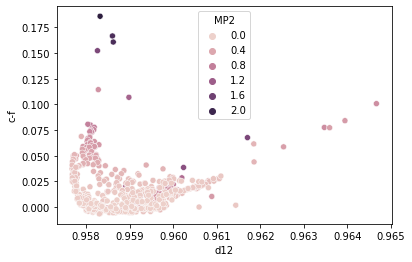

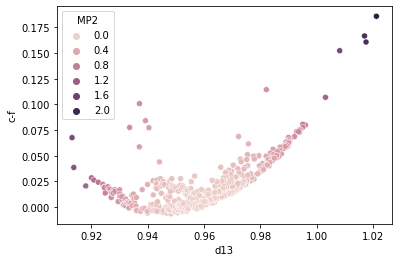

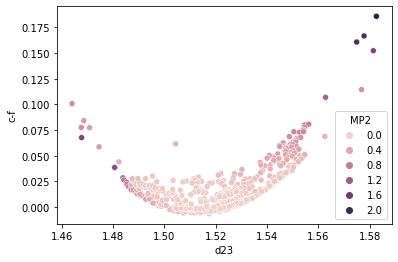

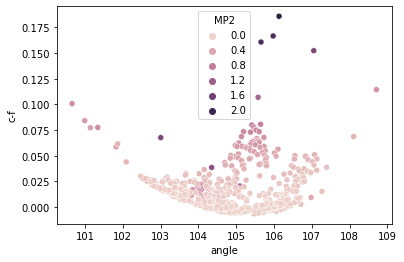

In [12]:
sns.scatterplot(data=result, x="d12", y="c-f", hue="MP2")
plt.show()

sns.scatterplot(data=result, x="d13", y="c-f", hue="MP2")
plt.show()

sns.scatterplot(data=result, x="d23", y="c-f", hue="MP2")
plt.show()

sns.scatterplot(data=result, x="angle", y="c-f", hue="MP2")
plt.show()